In [19]:
import imageio
import numpy as np

In [20]:
# Method 1
def calc_threshold(image, t0): 
    t = t0
    t0 = 1000000
    while abs(t - t0) >= 0.5:
        print(f'{t = }')
        group_1 = image[image <= t]
        group_2 = image[image > t]
        avg_1 = np.mean(group_1)
        avg_2 = np.mean(group_2)

        t0 = t
        t = (avg_1 + avg_2)/2
    
    return t
    
def limiarization(image, t0):
    thresh = calc_threshold(image, t0)
    lim_image = np.zeros(image.shape, dtype=np.uint8)
    lim_image[image <= thresh] = 0
    lim_image[image > thresh] = 1

    return lim_image

In [21]:
# Method 2
def conv_point_1d(image, weights, x, a):
    sub_arr = image[x-a:x+a+1]
    res = np.sum(np.multiply(sub_arr, weights))
    return int(res)

def filter_1d(image, n, weights):
    image_1d = image.flatten()
    length_1d = image_1d.shape[0]
    w_offset = int((n - 1)/2)
    padded_1d = np.pad(image_1d, w_offset, 'wrap')
    weights_flipped = np.flip(weights)
    result_1d = np.zeros(length_1d)
    
    for i in range(w_offset, length_1d):
        result_1d[i-w_offset] = conv_point_1d(padded_1d, weights_flipped, i, w_offset)
    
    result = result_1d.reshape(image.shape).astype(np.uint8)
    return result

In [22]:
# Method 3
def conv_point_2d(image, weights, x, y, a, b):
    sub_image = image[x-a:x+a+1, y-b:y+b+1]
    res = np.sum(np.multiply(sub_image, weights))
    return int(res)

def filter_2d(image, n, weights):
    rows, cols = image.shape
    n, m = weights.shape
    a = (n - 1)//2
    b = (m - 1)//2
    weights_flipped = np.flip(np.flip(weights, 0), 1)
    padded_image = np.pad(image, (a, b), 'edge')
    result = np.zeros(image.shape)

    for i in range(a, rows):
        for j in range(b, cols):
            result[i-a, j-b] = conv_point_2d(padded_image, weights_flipped, i, j, a, b)
    
    return result

In [23]:
# Method 4
def median_point(image, offset, x, y):
    sub_image = image[x-offset:x+offset+1, y-offset:y+offset+1]
    sub_image = sub_image.flatten()
    sub_image = sorted(sub_image)
    size_sub_image = len(sub_image)
    if size_sub_image % 2 == 0:
        median = (sub_image[size_sub_image // 2] + sub_image[(size_sub_image // 2) + 1]) // 2
    else:
        median = sub_image[size_sub_image // 2]
    return median

def median_filter(image, n):
    rows, cols = image.shape
    offset = (n - 1)//2
    padded_image = np.pad(image, offset, 'constant')
    result = np.zeros(image.shape)

    for i in range(offset, rows):
        for j in range(offset, cols):
            result[i-offset, j-offset] = median_point(padded_image, offset, i ,j)
    
    return result

In [24]:
# Calculate error
def calculate_root_mean_sq_err(ref_image, gen_image):
    n, m = gen_image.shape
    subtracted_image = gen_image.astype(float) - ref_image.astype(float)
    squared_image = np.square(subtracted_image)
    mean_image = squared_image/(n*m)
    err = np.sum(mean_image)
    
    return np.sqrt(err)

In [25]:
# read program arguments
input_filename = 'examples/Casos_Teste/ex12.in'
with open(input_filename, 'r') as in_file:
    input_image = in_file.readline().strip()
    method = int(in_file.readline().strip())
    if method == 1:
        t0 = int(in_file.readline().strip())
    elif method == 2:
        n = int(in_file.readline().strip())
        weights = np.array(in_file.readline().strip().split(' '), dtype=np.float64)
    elif method == 3:
        n = int(in_file.readline().strip())
        weights = np.array([in_file.readline().strip().split(' ') for i in range(n)], dtype=np.float64)
        t0 = int(in_file.readline().strip())
    elif method == 4:
        n = int(in_file.readline().strip())

In [26]:
image = imageio.imread(f'examples/Casos_Teste/{input_image}')
if method == 1:
    result = limiarization(image, t0)
    print(f'{result = }')

elif method == 2:
    result = filter_1d(image, n, weights)
    print(f'{result = }')

elif method == 3:
    result = filter_2d(image, n, weights)
    result = limiarization(result, t0)
    print(f'{result = }')

elif method == 4:
    result = median_filter(image, n)
    print(f'{result = }')

result_error = calculate_root_mean_sq_err(image, result)
print(result_error)

result = array([[225, 100,  37, ...,  49, 134, 141],
       [211,  75, 191, ...,  92, 114, 143],
       [224, 165, 106, ...,   4, 127, 142],
       ...,
       [189, 166,  67, ...,  89,  24, 176],
       [ 39,   7,  52, ..., 165, 222,  99],
       [ 27,  27, 128, ...,   0,   0,   0]], dtype=uint8)
89.22199023454002


(-0.5, 511.5, 511.5, -0.5)

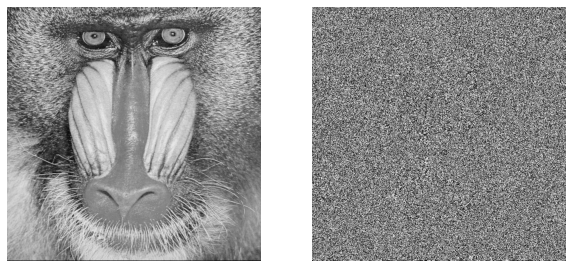

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 20))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap="gray", vmin=0, vmax=255)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(result, cmap="gray", vmin=0, vmax=255)
plt.axis('off')